##**PREDICT BURNED AREA FOREST FIRES NEURAL NETWORKS**

###**Importing Necessary Libraries**

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings('ignore')

# first neural network with keras
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

###**Import Dataset**

In [ ]:
forest_data = pd.read_csv('forestfires.csv')
forest_data.head(6)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small


###**Data Understanding:**

In [ ]:
# Checking for the information of the data
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [ ]:
forest_data.shape

(517, 31)

In [ ]:
forest_data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [ ]:
forest_data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Considering the important factor for Burned Area
fd = forest_data.iloc[:,2:11]
forest = pd.concat([fd,forest_data.size_category],axis=1)
forest.head(7)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small
5,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,small
6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,small


###**Visualization**

<Axes: xlabel='count', ylabel='day'>

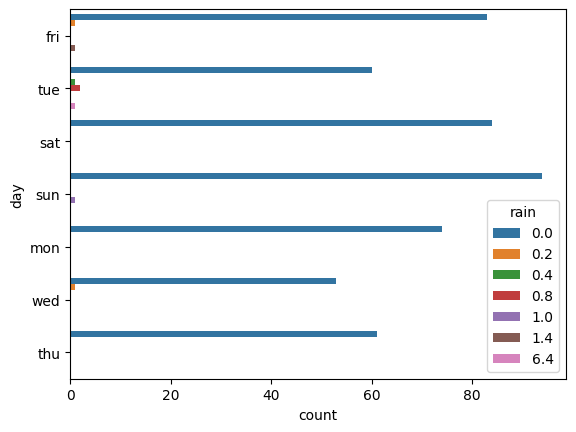

In [ ]:
sns.countplot(data=forest_data, y="day", hue="rain")

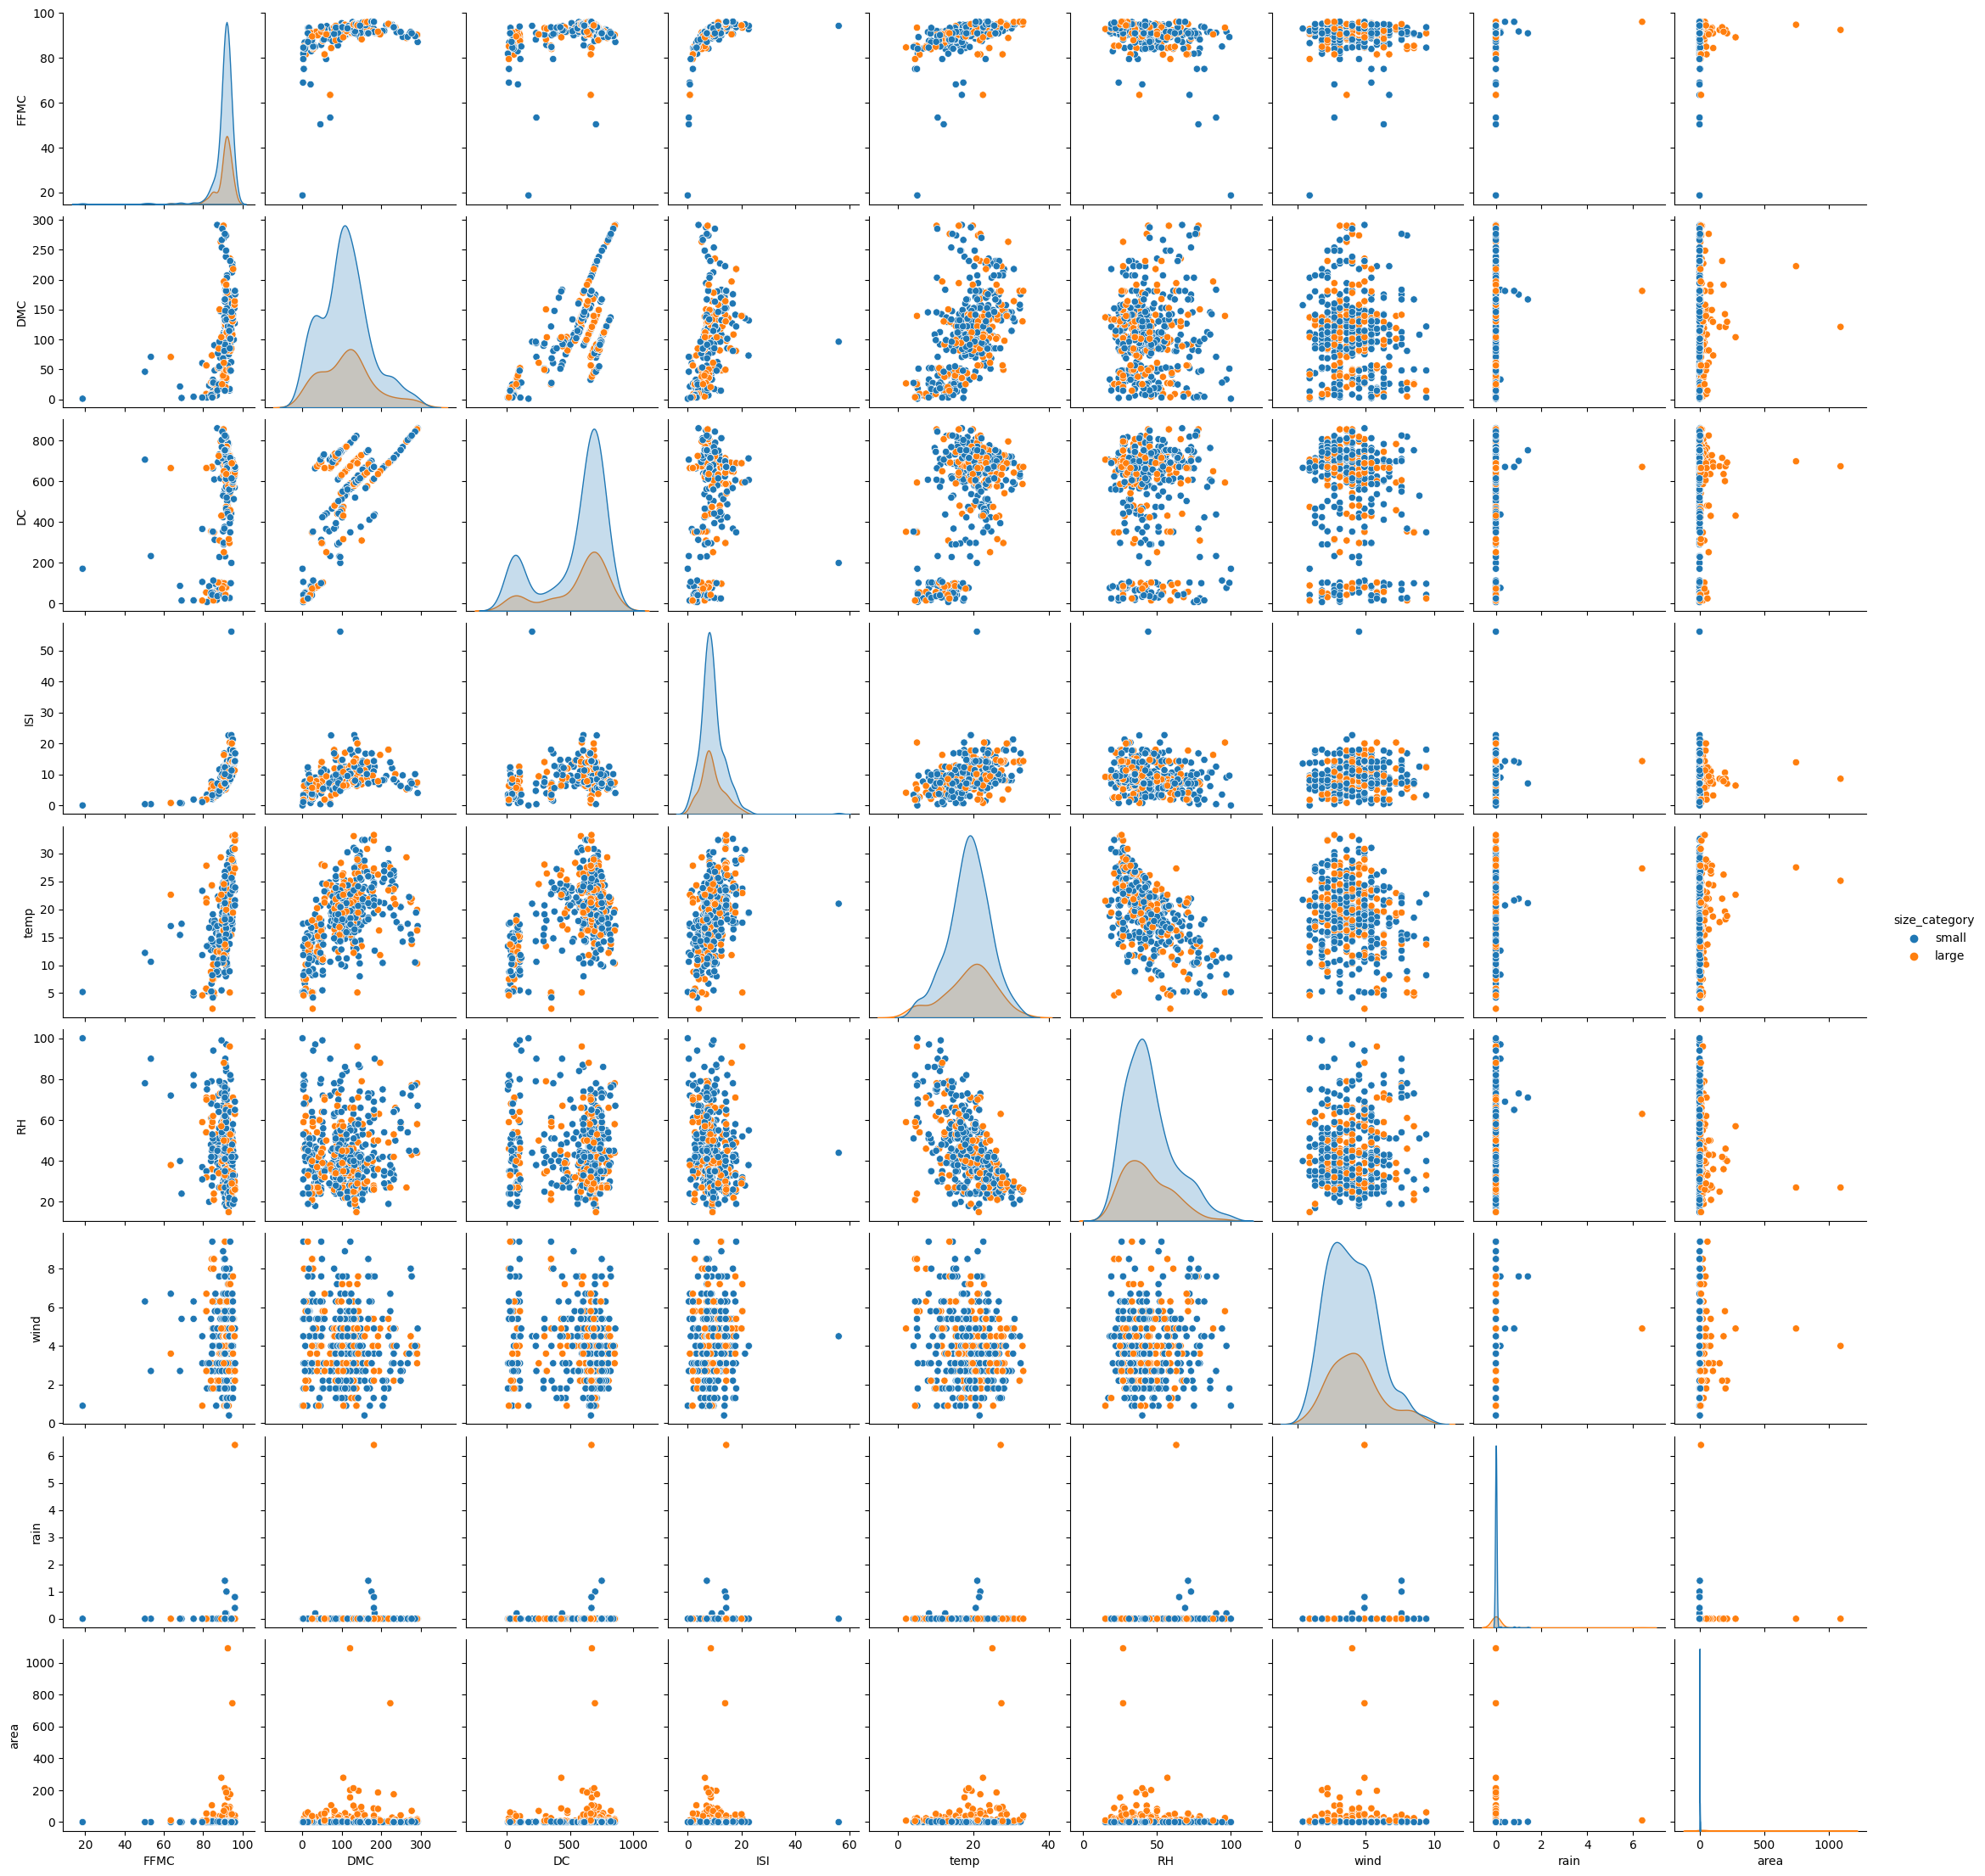

In [ ]:
sns.pairplot(forest, hue='size_category')

<Axes: xlabel='count', ylabel='month'>

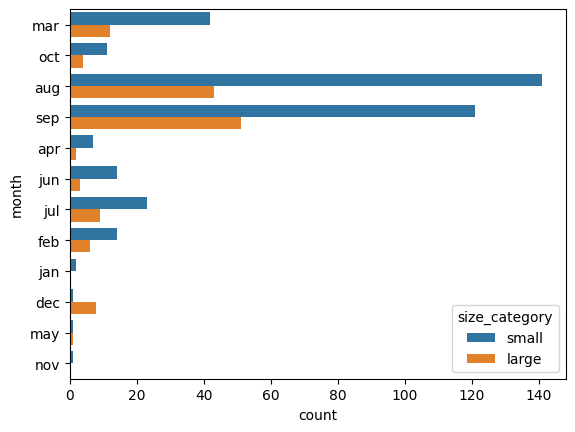

In [ ]:
sns.countplot(data=forest_data, y="month", hue="size_category")

<Axes: xlabel='day', ylabel='count'>

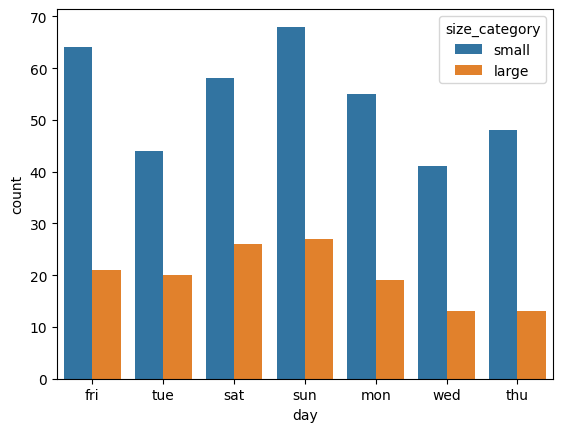

In [ ]:
sns.countplot(data=forest_data, x="day", hue="size_category")

In [ ]:
# Grouping the Data by categorical column
forest_data.groupby(['size_category', 'month' ,'day']).count()

FFMC  DMC  DC  ISI  temp  RH  wind  rain  area  \
size_category month day                                                   
large         apr   sun     1    1   1    1     1   1     1     1     1   
                    thu     1    1   1    1     1   1     1     1     1   
              aug   fri     6    6   6    6     6   6     6     6     6   
                    mon     1    1   1    1     1   1     1     1     1   
                    sat    10   10  10   10    10  10    10    10    10   
...                       ...  ...  ..  ...   ...  ..   ...   ...   ...   
small         sep   sat    17   17  17   17    17  17    17    17    17   
                    sun    19   19  19   19    19  19    19    19    19   
                    thu    16   16  16   16    16  16    16    16    16   
                    tue    11   11  11   11    11  11    11    11    11   
                    wed     9    9   9    9     9   9     9     9     9   

                         dayfri  ...  monthdec  monthfeb  monthjan  monthjul  \
size_category month day          ...                                           
large         apr   sun       1  ...         1         1         1         1   
                    thu       1  ...         1         1         1         1   
              aug   fri       6  ...         6         6         6         6   
                    mon       1  ...         1         1         1         1   
                    sat      10  ...        10        10        10        10   
...                         ...  ...       ...       ...       ...       ...   
small         sep   sat      17  ...        17        17        17        17   
                    sun      19  ...        19        19        19        19   
                    thu      16  ...        16        16        16        16   
                    tue      11  ...        11        11        11        11   
                    wed       9  ...         9         9         9         9   

                         monthjun  monthmar  monthmay  monthnov  monthoct  \
size_category month day                                                     
large         apr   sun         1         1         1         1         1   
                    thu         1         1         1         1         1   
              aug   fri         6         6         6         6         6   
                    mon         1         1         1         1         1   
                    sat        10        10        10        10        10   
...                           ...       ...       ...       ...       ...   
small         sep   sat        17        17        17        17        17   
                    sun        19        19        19        19        19   
                    thu        16        16        16        16        16   
                    tue        11        11        11        11        11   
                    wed         9         9         9         9         9   

                         monthsep  
size_category month day            
large         apr   sun         1  
                    thu         1  
              aug   fri         6  
                    mon         1  
                    sat        10  
...                           ...  
small         sep   sat        17  
                    sun        19  
                    thu        16  
                    tue        11  
                    wed         9  

[101 rows x 28 columns]

In [ ]:
label_encoder = preprocessing.LabelEncoder()
forest['size_category']=label_encoder.fit_transform(forest['size_category'])
forest.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [ ]:
# split into input (X) and output (y) variables
x=forest.iloc[:,0:9]
y=forest.iloc[:,9]
x.head(7)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=9, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset
history = model.fit(x, y, epochs=91, validation_split=0.33, batch_size=10)

Epoch 1/91
35/35 [==============================] - 0s 9ms/step - loss: 0.0305 - accuracy: 0.9913 - val_loss: 0.0909 - val_accuracy: 0.9591
Epoch 2/91
35/35 [==============================] - 0s 12ms/step - loss: 0.0341 - accuracy: 0.9827 - val_loss: 0.2437 - val_accuracy: 0.9181
Epoch 3/91
35/35 [==============================] - 0s 13ms/step - loss: 0.0462 - accuracy: 0.9798 - val_loss: 0.1907 - val_accuracy: 0.9298
Epoch 4/91
35/35 [==============================] - 0s 7ms/step - loss: 0.0720 - accuracy: 0.9711 - val_loss: 0.1644 - val_accuracy: 0.9298
Epoch 5/91
35/35 [==============================] - 0s 4ms/step - loss: 0.0377 - accuracy: 0.9827 - val_loss: 0.0916 - val_accuracy: 0.9591
Epoch 6/91
35/35 [==============================] - 0s 4ms/step - loss: 0.0502 - accuracy: 0.9769 - val_loss: 0.0827 - val_accuracy: 0.9532
Epoch 7/91
35/35 [==============================] - 0s 6ms/step - loss: 0.0329 - accuracy: 0.9913 - val_loss: 0.1048 - val_accuracy: 0.9649
Epoch 8/91
35/35 [

In [ ]:
# evaluate the keras model
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.0459 - accuracy: 0.9807
accuracy: 98.07%


In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


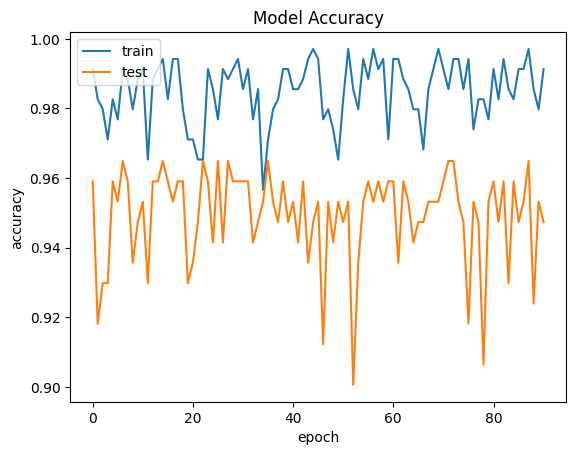

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

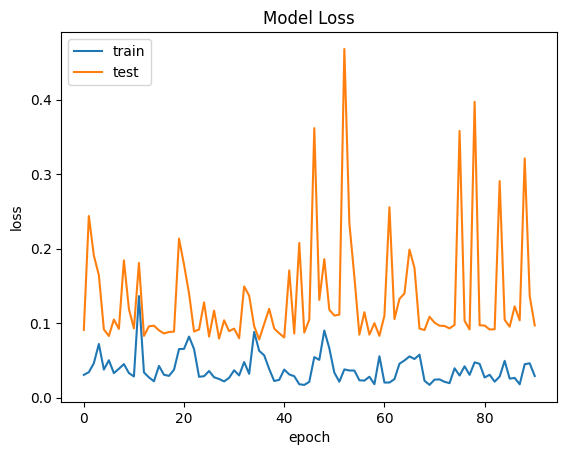

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
array = forest.values 
X = array[:,0:9]
y = array[:,9]

In [ ]:
X

array([[ 86.2 ,  26.2 ,  94.3 , ...,   6.7 ,   0.  ,   0.  ],
       [ 90.6 ,  35.4 , 669.1 , ...,   0.9 ,   0.  ,   0.  ],
       [ 90.6 ,  43.7 , 686.9 , ...,   1.3 ,   0.  ,   0.  ],
       ...,
       [ 81.6 ,  56.7 , 665.6 , ...,   6.7 ,   0.  ,  11.16],
       [ 94.4 , 146.  , 614.7 , ...,   4.  ,   0.  ,   0.  ],
       [ 79.5 ,   3.  , 106.7 , ...,   4.5 ,   0.  ,   0.  ]])

In [ ]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
# Standardization
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X) 

In [ ]:
pd.DataFrame(X_standardized).describe() 

,0,1,2,3,4,5,6,7,8
count,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,-1.752306e-15,-2.748715e-17,6.871787e-17,1.030768e-17,2.542561e-16,2.198972e-16,-4.191790e-16,-6.871787e-18,4.123072e-17
std,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00
min,-1.304582e+01,-1.715608e+00,-2.179108e+00,-1.980578e+00,-2.876943e+00,-1.796637e+00,-2.021098e+00,-7.326831e-02,-2.020198e-01
25%,-8.063453e-02,-6.606652e-01,-4.448281e-01,-5.535954e-01,-5.842379e-01,-6.924563e-01,-7.361236e-01,-7.326831e-02,-2.020198e-01
50%,1.732292e-01,-4.020255e-02,4.691190e-01,-1.364774e-01,7.082076e-02,-1.403660e-01,-9.833712e-03,-7.326831e-02,-1.938429e-01
75%,4.089598e-01,4.927389e-01,6.696628e-01,3.904086e-01,6.741643e-01,5.344111e-01,4.929823e-01,-7.326831e-02,-9.870852e-02
max,1.007353e+00,2.819865e+00,1.261610e+00,1.033538e+01,2.484195e+00,3.417549e+00,3.007063e+00,2.157228e+01,1.695111e+01


####**Tuning of Hyperparameters :- Batch Size and Epochs**

In [ ]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [ ]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=9, kernel_initializer='random_uniform', activation='relu'))
    model.add(Dense(9, kernel_initializer='random_uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [ ]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................


[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=1.000 total time=   3.8s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................


[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.750 total time=   2.4s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................


[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.660 total time=   1.9s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................


[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.738 total time=   3.7s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................


[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.786 total time=   3.0s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................


[CV 1/5; 2/9] END .....batch_size=10, epochs=50;, score=1.000 total time=   4.6s
[CV 2/5; 2/9] START batch_size=10, epochs=50....................................


[CV 2/5; 2/9] END .....batch_size=10, epochs=50;, score=1.000 total time=   5.7s
[CV 3/5; 2/9] START batch_size=10, epochs=50....................................


[CV 3/5; 2/9] END .....batch_size=10, epochs=50;, score=0.990 total time=   6.3s
[CV 4/5; 2/9] START batch_size=10, epochs=50....................................


[CV 4/5; 2/9] END .....batch_size=10, epochs=50;, score=0.971 total time=   5.7s
[CV 5/5; 2/9] START batch_size=10, epochs=50....................................


[CV 5/5; 2/9] END .....batch_size=10, epochs=50;, score=0.961 total time=   4.5s
[CV 1/5; 3/9] START batch_size=10, epochs=100...................................


[CV 1/5; 3/9] END ....batch_size=10, epochs=100;, score=1.000 total time=  11.4s
[CV 2/5; 3/9] START batch_size=10, epochs=100...................................


[CV 2/5; 3/9] END ....batch_size=10, epochs=100;, score=0.990 total time=   8.5s
[CV 3/5; 3/9] START batch_size=10, epochs=100...................................


[CV 3/5; 3/9] END ....batch_size=10, epochs=100;, score=0.971 total time=  11.7s
[CV 4/5; 3/9] START batch_size=10, epochs=100...................................


[CV 4/5; 3/9] END ....batch_size=10, epochs=100;, score=0.981 total time=   8.4s
[CV 5/5; 3/9] START batch_size=10, epochs=100...................................


[CV 5/5; 3/9] END ....batch_size=10, epochs=100;, score=0.971 total time=  11.4s
[CV 1/5; 4/9] START batch_size=20, epochs=10....................................


[CV 1/5; 4/9] END .....batch_size=20, epochs=10;, score=1.000 total time=   1.9s
[CV 2/5; 4/9] START batch_size=20, epochs=10....................................


[CV 2/5; 4/9] END .....batch_size=20, epochs=10;, score=0.750 total time=   2.0s
[CV 3/5; 4/9] START batch_size=20, epochs=10....................................


[CV 3/5; 4/9] END .....batch_size=20, epochs=10;, score=0.524 total time=   2.1s
[CV 4/5; 4/9] START batch_size=20, epochs=10....................................


[CV 4/5; 4/9] END .....batch_size=20, epochs=10;, score=0.689 total time=   1.8s
[CV 5/5; 4/9] START batch_size=20, epochs=10....................................


[CV 5/5; 4/9] END .....batch_size=20, epochs=10;, score=0.738 total time=   1.5s
[CV 1/5; 5/9] START batch_size=20, epochs=50....................................


[CV 1/5; 5/9] END .....batch_size=20, epochs=50;, score=1.000 total time=   3.0s
[CV 2/5; 5/9] START batch_size=20, epochs=50....................................


[CV 2/5; 5/9] END .....batch_size=20, epochs=50;, score=0.952 total time=   3.0s
[CV 3/5; 5/9] START batch_size=20, epochs=50....................................


[CV 3/5; 5/9] END .....batch_size=20, epochs=50;, score=0.893 total time=   6.3s
[CV 4/5; 5/9] START batch_size=20, epochs=50....................................


[CV 4/5; 5/9] END .....batch_size=20, epochs=50;, score=0.922 total time=   3.9s
[CV 5/5; 5/9] START batch_size=20, epochs=50....................................


[CV 5/5; 5/9] END .....batch_size=20, epochs=50;, score=0.922 total time=   4.0s
[CV 1/5; 6/9] START batch_size=20, epochs=100...................................


[CV 1/5; 6/9] END ....batch_size=20, epochs=100;, score=1.000 total time=   6.8s
[CV 2/5; 6/9] START batch_size=20, epochs=100...................................


[CV 2/5; 6/9] END ....batch_size=20, epochs=100;, score=1.000 total time=   6.7s
[CV 3/5; 6/9] START batch_size=20, epochs=100...................................


[CV 3/5; 6/9] END ....batch_size=20, epochs=100;, score=0.981 total time=   6.7s
[CV 4/5; 6/9] START batch_size=20, epochs=100...................................


[CV 4/5; 6/9] END ....batch_size=20, epochs=100;, score=0.971 total time=   6.3s
[CV 5/5; 6/9] START batch_size=20, epochs=100...................................


[CV 5/5; 6/9] END ....batch_size=20, epochs=100;, score=0.961 total time=   6.5s
[CV 1/5; 7/9] START batch_size=40, epochs=10....................................


[CV 1/5; 7/9] END .....batch_size=40, epochs=10;, score=1.000 total time=   1.6s
[CV 2/5; 7/9] START batch_size=40, epochs=10....................................


[CV 2/5; 7/9] END .....batch_size=40, epochs=10;, score=0.750 total time=   1.8s
[CV 3/5; 7/9] START batch_size=40, epochs=10....................................


[CV 3/5; 7/9] END .....batch_size=40, epochs=10;, score=0.524 total time=   2.3s
[CV 4/5; 7/9] START batch_size=40, epochs=10....................................


[CV 4/5; 7/9] END .....batch_size=40, epochs=10;, score=0.680 total time=   1.7s
[CV 5/5; 7/9] START batch_size=40, epochs=10....................................


[CV 5/5; 7/9] END .....batch_size=40, epochs=10;, score=0.709 total time=   1.4s
[CV 1/5; 8/9] START batch_size=40, epochs=50....................................


[CV 1/5; 8/9] END .....batch_size=40, epochs=50;, score=1.000 total time=   2.4s
[CV 2/5; 8/9] START batch_size=40, epochs=50....................................


[CV 2/5; 8/9] END .....batch_size=40, epochs=50;, score=0.788 total time=   2.4s
[CV 3/5; 8/9] START batch_size=40, epochs=50....................................


[CV 3/5; 8/9] END .....batch_size=40, epochs=50;, score=0.524 total time=   2.2s
[CV 4/5; 8/9] START batch_size=40, epochs=50....................................


[CV 4/5; 8/9] END .....batch_size=40, epochs=50;, score=0.786 total time=   3.7s
[CV 5/5; 8/9] START batch_size=40, epochs=50....................................


[CV 5/5; 8/9] END .....batch_size=40, epochs=50;, score=0.825 total time=   2.4s
[CV 1/5; 9/9] START batch_size=40, epochs=100...................................


[CV 1/5; 9/9] END ....batch_size=40, epochs=100;, score=1.000 total time=   3.5s
[CV 2/5; 9/9] START batch_size=40, epochs=100...................................


[CV 2/5; 9/9] END ....batch_size=40, epochs=100;, score=0.952 total time=   3.3s
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................


[CV 3/5; 9/9] END ....batch_size=40, epochs=100;, score=0.961 total time=   4.2s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................


[CV 4/5; 9/9] END ....batch_size=40, epochs=100;, score=0.951 total time=   3.7s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................


[CV 5/5; 9/9] END ....batch_size=40, epochs=100;, score=0.942 total time=   3.3s


In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.984466016292572, using {'batch_size': 10, 'epochs': 50}
0.7868932008743286,0.11422114870068648 with: {'batch_size': 10, 'epochs': 10}
0.984466016292572,0.015774825855992516 with: {'batch_size': 10, 'epochs': 50}
0.9825429439544677,0.011335107192363896 with: {'batch_size': 10, 'epochs': 100}
0.7402912616729737,0.15284711174055032 with: {'batch_size': 20, 'epochs': 10}
0.9379574179649353,0.036154198144365005 with: {'batch_size': 20, 'epochs': 50}
0.9825242757797241,0.015533976256851312 with: {'batch_size': 20, 'epochs': 100}
0.7325242638587952,0.15400213076804797 with: {'batch_size': 40, 'epochs': 10}
0.7848767757415771,0.15220876024189361 with: {'batch_size': 40, 'epochs': 50}
0.9612583994865418,0.02032153065145161 with: {'batch_size': 40, 'epochs': 100}


###Tuning of Hyperparameters:- Learning rate and Drop out rate

In [ ]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(9,input_dim = 9,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 6,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=   2.0s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.750 total time=   1.5s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.524 total time=   1.5s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.680 total time=   1.4s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.709 total time=   1.9s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 1/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=1.000 total time=   1.8s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 2/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.750 total time=   1.4s
[CV 3/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 3/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.524 total time=   1.4s
[CV 4/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 4/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.680 total time=   2.7s
[CV 5/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 5/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.699 total time=   1.5s
[CV 1/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 1/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=1.000 total time=   3.2s
[CV 2/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 2/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.750 total time=   2.2s
[CV 3/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 3/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.524 total time=   1.5s
[CV 4/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 4/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.680 total time=   1.4s
[CV 5/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 5/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.699 total time=   1.4s
[CV 1/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 1/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=1.000 total time=   1.5s
[CV 2/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 2/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.750 total time=   1.5s
[CV 3/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 3/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.534 total time=   2.2s
[CV 4/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 4/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.680 total time=   2.6s
[CV 5/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 5/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.699 total time=   1.6s
[CV 1/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 1/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=1.000 total time=   1.5s
[CV 2/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 2/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.750 total time=   1.6s
[CV 3/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 3/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.534 total time=   1.5s
[CV 4/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 4/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.680 total time=   1.5s
[CV 5/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 5/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.699 total time=   1.5s
[CV 1/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 1/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=1.000 total time=   2.0s
[CV 2/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 2/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.750 total time=   2.0s
[CV 3/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 3/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.524 total time=   1.5s
[CV 4/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 4/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.680 total time=   1.5s
[CV 5/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 5/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.709 total time=   1.9s
[CV 1/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 1/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=1.000 total time=   3.1s
[CV 2/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 2/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.750 total time=   1.8s
[CV 3/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 3/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.534 total time=   2.4s
[CV 4/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 4/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.680 total time=   1.6s
[CV 5/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 5/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.718 total time=   2.4s
[CV 1/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 1/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=1.000 total time=   2.3s
[CV 2/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 2/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.750 total time=   2.7s
[CV 3/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 3/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.534 total time=   2.0s
[CV 4/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 4/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.680 total time=   1.9s
[CV 5/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 5/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.699 total time=   1.5s
[CV 1/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 1/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=1.000 total time=   1.6s
[CV 2/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 2/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.750 total time=   1.6s
[CV 3/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 3/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.524 total time=   1.4s
[CV 4/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 4/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.680 total time=   1.5s
[CV 5/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 5/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.728 total time=   1.4s


In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.7364077687263488, using {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.7325242638587952,0.15400213076804797 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7325242757797241,0.15178268966445949 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.7325242757797241,0.15178268966445949 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7325242638587952,0.15400213076804797 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.7364077687263488,0.15112297894024251 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.7325242757797241,0.15178268966445949 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.7364077568054199,0.15359763543603858 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


####Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [ ]:
from keras.layers import Dropout
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(9,input_dim = 9,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 8,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=1.000 total time=   1.8s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.750 total time=   3.4s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.524 total time=   1.6s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.680 total time=   1.6s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.699 total time=   1.5s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................


[CV 1/5; 2/12] END activation_function=softmax, init=normal;, score=1.000 total time=   1.6s
[CV 2/5; 2/12] START activation_function=softmax, init=normal...................


[CV 2/5; 2/12] END activation_function=softmax, init=normal;, score=0.250 total time=   1.6s
[CV 3/5; 2/12] START activation_function=softmax, init=normal...................


[CV 3/5; 2/12] END activation_function=softmax, init=normal;, score=0.524 total time=   2.2s
[CV 4/5; 2/12] START activation_function=softmax, init=normal...................


[CV 4/5; 2/12] END activation_function=softmax, init=normal;, score=0.680 total time=   1.7s
[CV 5/5; 2/12] START activation_function=softmax, init=normal...................


[CV 5/5; 2/12] END activation_function=softmax, init=normal;, score=0.699 total time=   1.5s
[CV 1/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 1/5; 3/12] END activation_function=softmax, init=zero;, score=1.000 total time=   1.4s
[CV 2/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 2/5; 3/12] END activation_function=softmax, init=zero;, score=0.250 total time=   1.6s
[CV 3/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 3/5; 3/12] END activation_function=softmax, init=zero;, score=0.524 total time=   1.6s
[CV 4/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 4/5; 3/12] END activation_function=softmax, init=zero;, score=0.680 total time=   1.5s
[CV 5/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 5/5; 3/12] END activation_function=softmax, init=zero;, score=0.699 total time=   1.5s
[CV 1/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 1/5; 4/12] END activation_function=relu, init=uniform;, score=1.000 total time=   2.3s
[CV 2/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 2/5; 4/12] END activation_function=relu, init=uniform;, score=0.750 total time=   1.5s
[CV 3/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 3/5; 4/12] END activation_function=relu, init=uniform;, score=0.524 total time=   1.4s
[CV 4/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 4/5; 4/12] END activation_function=relu, init=uniform;, score=0.680 total time=   1.5s
[CV 5/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 5/5; 4/12] END activation_function=relu, init=uniform;, score=0.699 total time=   1.5s
[CV 1/5; 5/12] START activation_function=relu, init=normal......................


[CV 1/5; 5/12] END activation_function=relu, init=normal;, score=1.000 total time=   1.5s
[CV 2/5; 5/12] START activation_function=relu, init=normal......................


[CV 2/5; 5/12] END activation_function=relu, init=normal;, score=0.750 total time=   1.6s
[CV 3/5; 5/12] START activation_function=relu, init=normal......................


[CV 3/5; 5/12] END activation_function=relu, init=normal;, score=0.534 total time=   2.0s
[CV 4/5; 5/12] START activation_function=relu, init=normal......................


[CV 4/5; 5/12] END activation_function=relu, init=normal;, score=0.680 total time=   3.4s
[CV 5/5; 5/12] START activation_function=relu, init=normal......................


[CV 5/5; 5/12] END activation_function=relu, init=normal;, score=0.709 total time=   1.6s
[CV 1/5; 6/12] START activation_function=relu, init=zero........................


[CV 1/5; 6/12] END activation_function=relu, init=zero;, score=1.000 total time=   1.5s
[CV 2/5; 6/12] START activation_function=relu, init=zero........................


[CV 2/5; 6/12] END activation_function=relu, init=zero;, score=0.750 total time=   3.5s
[CV 3/5; 6/12] START activation_function=relu, init=zero........................


[CV 3/5; 6/12] END activation_function=relu, init=zero;, score=0.524 total time=   3.0s
[CV 4/5; 6/12] START activation_function=relu, init=zero........................


[CV 4/5; 6/12] END activation_function=relu, init=zero;, score=0.680 total time=   1.9s
[CV 5/5; 6/12] START activation_function=relu, init=zero........................


[CV 5/5; 6/12] END activation_function=relu, init=zero;, score=0.699 total time=   1.5s
[CV 1/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 1/5; 7/12] END activation_function=tanh, init=uniform;, score=1.000 total time=   1.5s
[CV 2/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 2/5; 7/12] END activation_function=tanh, init=uniform;, score=0.750 total time=   1.6s
[CV 3/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 3/5; 7/12] END activation_function=tanh, init=uniform;, score=0.583 total time=   1.7s
[CV 4/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 4/5; 7/12] END activation_function=tanh, init=uniform;, score=0.689 total time=   1.5s
[CV 5/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 5/5; 7/12] END activation_function=tanh, init=uniform;, score=0.718 total time=   1.5s
[CV 1/5; 8/12] START activation_function=tanh, init=normal......................


[CV 1/5; 8/12] END activation_function=tanh, init=normal;, score=1.000 total time=   2.3s
[CV 2/5; 8/12] START activation_function=tanh, init=normal......................


[CV 2/5; 8/12] END activation_function=tanh, init=normal;, score=0.750 total time=   1.6s
[CV 3/5; 8/12] START activation_function=tanh, init=normal......................


[CV 3/5; 8/12] END activation_function=tanh, init=normal;, score=0.563 total time=   1.4s
[CV 4/5; 8/12] START activation_function=tanh, init=normal......................


[CV 4/5; 8/12] END activation_function=tanh, init=normal;, score=0.689 total time=   1.4s
[CV 5/5; 8/12] START activation_function=tanh, init=normal......................


[CV 5/5; 8/12] END activation_function=tanh, init=normal;, score=0.738 total time=   1.5s
[CV 1/5; 9/12] START activation_function=tanh, init=zero........................


[CV 1/5; 9/12] END activation_function=tanh, init=zero;, score=1.000 total time=   1.5s
[CV 2/5; 9/12] START activation_function=tanh, init=zero........................


[CV 2/5; 9/12] END activation_function=tanh, init=zero;, score=0.750 total time=   1.4s
[CV 3/5; 9/12] START activation_function=tanh, init=zero........................


[CV 3/5; 9/12] END activation_function=tanh, init=zero;, score=0.524 total time=   1.5s
[CV 4/5; 9/12] START activation_function=tanh, init=zero........................


[CV 4/5; 9/12] END activation_function=tanh, init=zero;, score=0.680 total time=   2.4s
[CV 5/5; 9/12] START activation_function=tanh, init=zero........................


[CV 5/5; 9/12] END activation_function=tanh, init=zero;, score=0.699 total time=   1.5s
[CV 1/5; 10/12] START activation_function=linear, init=uniform..................


[CV 1/5; 10/12] END activation_function=linear, init=uniform;, score=1.000 total time=   1.5s
[CV 2/5; 10/12] START activation_function=linear, init=uniform..................


[CV 2/5; 10/12] END activation_function=linear, init=uniform;, score=0.750 total time=   2.7s
[CV 3/5; 10/12] START activation_function=linear, init=uniform..................


[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.583 total time=   1.8s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................


[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.689 total time=   2.5s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................


[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.718 total time=   2.0s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................


[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=1.000 total time=   1.7s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................


[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.750 total time=   1.5s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................


[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.563 total time=   1.7s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................


[CV 4/5; 11/12] END activation_function=linear, init=normal;, score=0.689 total time=   1.5s
[CV 5/5; 11/12] START activation_function=linear, init=normal...................


[CV 5/5; 11/12] END activation_function=linear, init=normal;, score=0.738 total time=   1.5s
[CV 1/5; 12/12] START activation_function=linear, init=zero.....................


[CV 1/5; 12/12] END activation_function=linear, init=zero;, score=1.000 total time=   1.5s
[CV 2/5; 12/12] START activation_function=linear, init=zero.....................


[CV 2/5; 12/12] END activation_function=linear, init=zero;, score=0.750 total time=   1.5s
[CV 3/5; 12/12] START activation_function=linear, init=zero.....................


[CV 3/5; 12/12] END activation_function=linear, init=zero;, score=0.524 total time=   2.3s
[CV 4/5; 12/12] START activation_function=linear, init=zero.....................


[CV 4/5; 12/12] END activation_function=linear, init=zero;, score=0.680 total time=   1.6s
[CV 5/5; 12/12] START activation_function=linear, init=zero.....................


[CV 5/5; 12/12] END activation_function=linear, init=zero;, score=0.699 total time=   1.4s


In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : 0.7480582594871521, using {'activation_function': 'tanh', 'init': 'uniform'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.6305825233459472,0.24482772813004766 with: {'activation_function': 'softmax', 'init': 'normal'}
0.6305825233459472,0.24482772813004766 with: {'activation_function': 'softmax', 'init': 'zero'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'uniform'}
0.734466016292572,0.15140339696325283 with: {'activation_function': 'relu', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'zero'}
0.7480582594871521,0.1379904999114243 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.7480582475662232,0.14229513110313408 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'tanh', 'init': 'zero'}
0.7480582594871521,0.1379904999114243 with: {'activation_

###Tuning of Hyperparameter :-Number of Neurons in activation layer

In [ ]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 9,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 8)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 8)
grid_result = grid.fit(X_standardized,y) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[CV 1/5] END ..............neuron1=4, neuron2=2;, score=1.000 total time=   3.8s


[CV 2/5] END ..............neuron1=4, neuron2=2;, score=0.750 total time=   1.6s


[CV 3/5] END ..............neuron1=4, neuron2=2;, score=0.573 total time=   1.6s


[CV 4/5] END ..............neuron1=4, neuron2=2;, score=0.680 total time=   1.6s


[CV 5/5] END ..............neuron1=4, neuron2=2;, score=0.728 total time=   1.6s


[CV 1/5] END ..............neuron1=4, neuron2=4;, score=1.000 total time=   1.5s


[CV 2/5] END ..............neuron1=4, neuron2=4;, score=0.750 total time=   1.9s


[CV 3/5] END ..............neuron1=4, neuron2=4;, score=0.573 total time=   3.7s


[CV 4/5] END ..............neuron1=4, neuron2=4;, score=0.689 total time=   1.9s


[CV 5/5] END ..............neuron1=4, neuron2=4;, score=0.718 total time=   1.6s


[CV 1/5] END ..............neuron1=4, neuron2=8;, score=1.000 total time=   1.6s


[CV 2/5] END ..............neuron1=4, neuron2=8;, score=0.750 total time=   1.9s


[CV 3/5] END ..............neuron1=4, neuron2=8;, score=0.573 total time=   1.7s


[CV 4/5] END ..............neuron1=4, neuron2=8;, score=0.689 total time=   2.2s


[CV 5/5] END ..............neuron1=4, neuron2=8;, score=0.728 total time=   1.8s


[CV 1/5] END ..............neuron1=8, neuron2=2;, score=1.000 total time=   1.5s


[CV 2/5] END ..............neuron1=8, neuron2=2;, score=0.750 total time=   1.6s


[CV 3/5] END ..............neuron1=8, neuron2=2;, score=0.573 total time=   1.5s


[CV 4/5] END ..............neuron1=8, neuron2=2;, score=0.689 total time=   1.5s


[CV 5/5] END ..............neuron1=8, neuron2=2;, score=0.728 total time=   1.8s


[CV 1/5] END ..............neuron1=8, neuron2=4;, score=1.000 total time=   2.6s


[CV 2/5] END ..............neuron1=8, neuron2=4;, score=0.750 total time=   3.3s


[CV 3/5] END ..............neuron1=8, neuron2=4;, score=0.621 total time=   1.7s


[CV 4/5] END ..............neuron1=8, neuron2=4;, score=0.689 total time=   1.9s


[CV 5/5] END ..............neuron1=8, neuron2=4;, score=0.738 total time=   2.1s


[CV 1/5] END ..............neuron1=8, neuron2=8;, score=1.000 total time=   2.0s


[CV 2/5] END ..............neuron1=8, neuron2=8;, score=0.750 total time=   2.0s


[CV 3/5] END ..............neuron1=8, neuron2=8;, score=0.621 total time=   2.8s


[CV 4/5] END ..............neuron1=8, neuron2=8;, score=0.689 total time=   2.0s


[CV 5/5] END ..............neuron1=8, neuron2=8;, score=0.748 total time=   3.9s


[CV 1/5] END .............neuron1=16, neuron2=2;, score=1.000 total time=   2.0s


[CV 2/5] END .............neuron1=16, neuron2=2;, score=0.750 total time=   2.1s


[CV 3/5] END .............neuron1=16, neuron2=2;, score=0.631 total time=   2.4s


[CV 4/5] END .............neuron1=16, neuron2=2;, score=0.689 total time=   1.8s


[CV 5/5] END .............neuron1=16, neuron2=2;, score=0.718 total time=   1.9s


[CV 1/5] END .............neuron1=16, neuron2=4;, score=1.000 total time=   2.0s


[CV 2/5] END .............neuron1=16, neuron2=4;, score=0.750 total time=   2.0s


[CV 3/5] END .............neuron1=16, neuron2=4;, score=0.621 total time=   2.0s


[CV 4/5] END .............neuron1=16, neuron2=4;, score=0.689 total time=   2.2s


[CV 5/5] END .............neuron1=16, neuron2=4;, score=0.748 total time=   1.8s


[CV 1/5] END .............neuron1=16, neuron2=8;, score=1.000 total time=   1.5s


[CV 2/5] END .............neuron1=16, neuron2=8;, score=0.750 total time=   2.0s


[CV 3/5] END .............neuron1=16, neuron2=8;, score=0.631 total time=   1.5s


[CV 4/5] END .............neuron1=16, neuron2=8;, score=0.699 total time=   1.8s


[CV 5/5] END .............neuron1=16, neuron2=8;, score=0.767 total time=   1.9s


In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7694174766540527, using {'neuron1': 16, 'neuron2': 8}
0.7461164951324463,0.14089048197823736 with: {'neuron1': 4, 'neuron2': 2}
0.7461165070533753,0.14035423618382342 with: {'neuron1': 4, 'neuron2': 4}
0.7480582475662232,0.14002477469572766 with: {'neuron1': 4, 'neuron2': 8}
0.7480582475662232,0.14002477469572766 with: {'neuron1': 8, 'neuron2': 2}
0.7597087383270263,0.12837947358313176 with: {'neuron1': 8, 'neuron2': 4}
0.7616504907608033,0.12810752124406677 with: {'neuron1': 8, 'neuron2': 8}
0.7577669858932495,0.1272955917736869 with: {'neuron1': 16, 'neuron2': 2}
0.7616504907608033,0.12810752124406677 with: {'neuron1': 16, 'neuron2': 4}
0.7694174766540527,0.12461648615258164 with: {'neuron1': 16, 'neuron2': 8}


####Training model with optimum values of Hyperparameters

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 9,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8,input_dim = 12,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.01) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 10)

# Fitting the model

model.fit(X_standardized,y)

# Predicting using trained model

y_predict = model.predict(X_standardized)

# Printing the metrics
print(accuracy_score(y,y_predict))

17/17 [==============================] - 0s 2ms/step
0.8123791102514507
